In [89]:
dataframe = pd.read_csv("../../CT-Encoders/MLNS.csv")
dataframe

,Unnamed: 0,patient_id,path,ct_segmentation,in_range
0,0,case_0270,10-03-2017-48102/9.000000-19707,True,1
1,1,case_0303,12-06-2004-36126/2.000000-90406,True,1
2,2,case_0695,06-05-2011-05331/2.000000-43718,True,1
3,3,case_0742,12-05-2013-21366/5.000000-19298,True,0
4,4,case_0030,06-29-2012-17045/2.000000-44751,True,1
...,...,...,...,...,...
508,508,case_0400,04-23-2019-13778/302.000000-06413,True,1
509,509,case_0032,01-11-2012-62340/2.000000-67295,True,1
510,510,case_0955,01-11-2010-38766/19.000000-89579,True,1
511,511,case_0596,06-26-2016-34524/6.000000-06510,True,1


In [256]:
import pydicom as dicom

def get_dcm(path):
    pat_files=os.listdir(path)
    pat_files.sort()
    img_3d=[]
    for i in pat_files:
        dicom_img=dicom.dcmread(os.path.join(path,i))
        slope=dicom_img[(0x0028, 0x1053)].value
        intercept=dicom_img[(0x0028, 0x1052)].value
        img_3d.append(dicom_img.pixel_array*slope + intercept)
    array_3d = np.array(img_3d)
    return array_3d.transpose(1,2,0)
# D x H x W  => H x W x D

def windowing_ct(width, level):
    lower_bound = level - width/2
    upper_bound = level + width/2
    return lower_bound, upper_bound

def apply_window_ct(ct, width, level):
    ct_min_val, ct_max_val = windowing_ct(width, level)
    ct_range = ct_max_val - ct_min_val
    ct = (ct - ct_min_val) / ct_range
    ct = np.clip(ct, 0, 1)
    return ct

In [244]:
dataframe

,Unnamed: 0,patient_id,path,ct_segmentation,in_range
0,0,case_0270,10-03-2017-48102/9.000000-19707,True,1
1,1,case_0303,12-06-2004-36126/2.000000-90406,True,1
2,2,case_0695,06-05-2011-05331/2.000000-43718,True,1
4,4,case_0030,06-29-2012-17045/2.000000-44751,True,1
5,5,case_0489,04-20-2009-16393/2.000000-14966,True,1
...,...,...,...,...,...
507,507,case_0247,05-02-2017-23267/302.000000-63775,True,1
508,508,case_0400,04-23-2019-13778/302.000000-06413,True,1
509,509,case_0032,01-11-2012-62340/2.000000-67295,True,1
510,510,case_0955,01-11-2010-38766/19.000000-89579,True,1


In [255]:
import pandas as pd
import numpy as np
from tqdm import tqdm
dataframe = pd.read_csv("../../CT-Encoders/MLNS.csv")
dataframe_1 = dataframe[dataframe["in_range"]==1]
img_folder="../../../data/Mediastinal-Lymph-Node-SEG/Mediastinal-Lymph-Node-SEG-DA-RAD/Mediastinal-Lymph-Node-SEG"
in_range=[]
for number in tqdm(range(len(dataframe_1))):
    file_data=dataframe_1.iloc[number]
    img_path = os.path.join(img_folder,file_data["patient_id"],file_data["path"])
    image,suma,slope,intercept = get_dcm(img_path)
    image_apply = apply_window_ct(image, width=1800, level=40)
    print(np.mean(image_apply))
    

  0%|▌                                                                                                                                   | 2/427 [00:00<01:09,  6.11it/s]

0.22678408285742047
0.1574659382182665


  1%|█▏                                                                                                                                  | 4/427 [00:00<01:29,  4.72it/s]

0.1966507017320022
0.1681983053804649


  1%|█▌                                                                                                                                  | 5/427 [00:01<01:34,  4.48it/s]

0.14683085996839765


  2%|██▏                                                                                                                                 | 7/427 [00:01<02:11,  3.19it/s]

0.17172889233976862
0.17695902427930474


  2%|██▍                                                                                                                                 | 8/427 [00:02<02:08,  3.27it/s]

0.17019654328795658


  2%|██▊                                                                                                                                 | 9/427 [00:02<01:57,  3.56it/s]

0.18301393170923116


  3%|███▎                                                                                                                               | 11/427 [00:02<01:34,  4.40it/s]

0.17873458835084596
0.16842120202510089


  3%|███▉                                                                                                                               | 13/427 [00:03<02:19,  2.96it/s]

0.11415107900562545
0.18381723549630935


  3%|████▎                                                                                                                              | 14/427 [00:04<02:04,  3.32it/s]

0.1321518802835486


  4%|████▉                                                                                                                              | 16/427 [00:04<02:05,  3.28it/s]

0.16278503171522632
0.13646652648151308


  4%|█████▏                                                                                                                             | 17/427 [00:04<01:53,  3.61it/s]

0.1573265790340407


  4%|█████▊                                                                                                                             | 19/427 [00:05<01:35,  4.28it/s]

0.19613028906176436
0.18364983919382652


  5%|██████▍                                                                                                                            | 21/427 [00:05<01:19,  5.14it/s]

0.1528662439341388
0.12081606935571748


  5%|██████▋                                                                                                                            | 22/427 [00:05<01:13,  5.49it/s]

0.18706839091086452


  6%|███████▎                                                                                                                           | 24/427 [00:06<01:52,  3.59it/s]

0.19802529956431222
0.15428221431779257


  6%|███████▉                                                                                                                           | 26/427 [00:07<02:33,  2.62it/s]

0.1980265999056582
0.10795772853375148


  7%|████████▌                                                                                                                          | 28/427 [00:08<01:51,  3.57it/s]

0.16610971959039506
0.1650555590876828


  7%|█████████▏                                                                                                                         | 30/427 [00:08<01:44,  3.80it/s]

0.18354744712979199
0.16939924587950028


  7%|█████████▌                                                                                                                         | 31/427 [00:08<01:31,  4.33it/s]

0.13401985018861035


  8%|██████████                                                                                                                         | 33/427 [00:09<01:19,  4.97it/s]

0.1733585342752594
0.1415067850319478


  8%|██████████▍                                                                                                                        | 34/427 [00:09<01:15,  5.23it/s]

0.12072680537371727


  8%|███████████                                                                                                                        | 36/427 [00:09<01:12,  5.42it/s]

0.20404547029283346
0.1367641650993931


  9%|███████████▋                                                                                                                       | 38/427 [00:10<01:11,  5.46it/s]

0.22284146765358434
0.1929294515997816


  9%|███████████▉                                                                                                                       | 39/427 [00:10<01:08,  5.64it/s]

0.14762416068953718


  9%|████████████▎                                                                                                                      | 40/427 [00:10<01:41,  3.80it/s]

0.17639724083631608


 10%|████████████▌                                                                                                                      | 41/427 [00:10<01:40,  3.83it/s]

0.16567662566672767


 10%|█████████████▏                                                                                                                     | 43/427 [00:11<01:31,  4.22it/s]

0.14207358293865469
0.20461360546073543


 10%|█████████████▍                                                                                                                     | 44/427 [00:11<01:20,  4.73it/s]

0.17819418738408324
0.1730995316533317


 11%|██████████████▍                                                                                                                    | 47/427 [00:12<01:07,  5.63it/s]

0.20183620852045506
0.12144859248194187


 11%|███████████████                                                                                                                    | 49/427 [00:12<01:08,  5.48it/s]

0.15672912399701872
0.16830312711383255


 12%|███████████████▋                                                                                                                   | 51/427 [00:12<01:09,  5.43it/s]

0.16704750853460232
0.16251966698111842


 12%|███████████████▉                                                                                                                   | 52/427 [00:13<01:49,  3.44it/s]

0.13823159351254471


 13%|████████████████▌                                                                                                                  | 54/427 [00:14<02:18,  2.68it/s]

0.18729149119059296
0.13553522634227388


 13%|█████████████████▏                                                                                                                 | 56/427 [00:14<01:42,  3.63it/s]

0.15402713468165954
0.18003761074343475


 14%|█████████████████▊                                                                                                                 | 58/427 [00:15<01:21,  4.51it/s]

0.19129435350172905
0.19321571365796014


 14%|██████████████████                                                                                                                 | 59/427 [00:15<01:15,  4.88it/s]

0.19784950232535548


 14%|██████████████████▍                                                                                                                | 60/427 [00:15<01:20,  4.54it/s]

0.2244091458093544


 15%|███████████████████                                                                                                                | 62/427 [00:16<01:28,  4.12it/s]

0.19700501594440084
0.16610442453258187


 15%|███████████████████▋                                                                                                               | 64/427 [00:16<01:22,  4.38it/s]

0.12076953218782144
0.20211244640741313


 15%|████████████████████▏                                                                                                              | 66/427 [00:16<01:17,  4.66it/s]

0.2055658745356475
0.16518420823524319


 16%|████████████████████▌                                                                                                              | 67/427 [00:17<01:12,  4.99it/s]

0.1518495383469953


 16%|████████████████████▊                                                                                                              | 68/427 [00:17<01:14,  4.85it/s]

0.15534857062042742


 16%|█████████████████████▏                                                                                                             | 69/427 [00:18<02:10,  2.75it/s]

0.1594501566871036


 16%|█████████████████████▍                                                                                                             | 70/427 [00:18<01:53,  3.14it/s]

0.175445369026877


 17%|██████████████████████                                                                                                             | 72/427 [00:18<01:31,  3.87it/s]

0.167122423595852
0.1457789146873147


 17%|██████████████████████▋                                                                                                            | 74/427 [00:19<01:14,  4.74it/s]

0.20134352573499595
0.18719454881140726


 18%|███████████████████████                                                                                                            | 75/427 [00:19<01:16,  4.59it/s]

0.15749776061983906


 18%|███████████████████████▌                                                                                                           | 77/427 [00:19<01:14,  4.70it/s]

0.17651242548478538
0.13996994986224223


 19%|████████████████████████▏                                                                                                          | 79/427 [00:20<01:11,  4.86it/s]

0.12253820229861069
0.15486723910095862


 19%|████████████████████████▌                                                                                                          | 80/427 [00:20<01:22,  4.21it/s]

0.14163915640947844


 19%|█████████████████████████▏                                                                                                         | 82/427 [00:20<01:09,  4.94it/s]

0.1601811490929321
0.1513915840276663


 19%|█████████████████████████▍                                                                                                         | 83/427 [00:20<01:14,  4.63it/s]

0.16033076670140398


 20%|█████████████████████████▊                                                                                                         | 84/427 [00:21<01:19,  4.30it/s]

0.22716136290662128


 20%|██████████████████████████▍                                                                                                        | 86/427 [00:21<01:13,  4.67it/s]

0.17706583634587664
0.17284295947269326


 21%|██████████████████████████▉                                                                                                        | 88/427 [00:22<01:07,  5.03it/s]

0.1631906759023899
0.15209539445487708


 21%|███████████████████████████▎                                                                                                       | 89/427 [00:22<01:08,  4.90it/s]

0.17733895184399517


 21%|███████████████████████████▌                                                                                                       | 90/427 [00:23<02:08,  2.62it/s]

0.1874160423855164


 21%|███████████████████████████▉                                                                                                       | 91/427 [00:23<01:51,  3.02it/s]

0.1887289555867518


 22%|████████████████████████████▌                                                                                                      | 93/427 [00:23<01:24,  3.98it/s]

0.13914193122876642
0.14942142704386793


 22%|█████████████████████████████▏                                                                                                     | 95/427 [00:24<01:11,  4.64it/s]

0.1793974251662538
0.20653409875063475


 23%|█████████████████████████████▊                                                                                                     | 97/427 [00:24<01:06,  4.98it/s]

0.14104916694003797
0.19395628707821366


 23%|██████████████████████████████▎                                                                                                    | 99/427 [00:24<00:58,  5.57it/s]

0.17296422116836185
0.21499609305534842


 24%|██████████████████████████████▋                                                                                                   | 101/427 [00:25<00:54,  6.02it/s]

0.17655482948690207
0.16039511591153077


 24%|███████████████████████████████▎                                                                                                  | 103/427 [00:25<01:22,  3.95it/s]

0.12779982241689766
0.1302975423725603


 25%|███████████████████████████████▉                                                                                                  | 105/427 [00:26<01:32,  3.49it/s]

0.1198083153735131
0.16067358683026023


 25%|████████████████████████████████▎                                                                                                 | 106/427 [00:27<02:16,  2.35it/s]

0.17732000753884658


 25%|████████████████████████████████▌                                                                                                 | 107/427 [00:27<02:04,  2.57it/s]

0.27763651571502374


 26%|█████████████████████████████████▏                                                                                                | 109/427 [00:27<01:33,  3.40it/s]

0.15832044809072246
0.1602891479150902


 26%|█████████████████████████████████▍                                                                                                | 110/427 [00:28<01:25,  3.69it/s]

0.17025926342086176


 26%|██████████████████████████████████                                                                                                | 112/427 [00:28<01:13,  4.27it/s]

0.17221656858099246
0.17141590085995756


 26%|██████████████████████████████████▍                                                                                               | 113/427 [00:29<02:08,  2.45it/s]

0.16377378895146674


 27%|███████████████████████████████████                                                                                               | 115/427 [00:29<01:29,  3.49it/s]

0.1738573862368763
0.1968948462274339


 27%|███████████████████████████████████▌                                                                                              | 117/427 [00:30<01:10,  4.39it/s]

0.1622778367784286
0.18502208339924722


 28%|████████████████████████████████████▏                                                                                             | 119/427 [00:30<00:59,  5.15it/s]

0.2015812764881892
0.1569335726896925


 28%|████████████████████████████████████▌                                                                                             | 120/427 [00:30<01:14,  4.13it/s]

0.19028103790585962


 28%|████████████████████████████████████▊                                                                                             | 121/427 [00:31<01:13,  4.18it/s]

0.16400405251567982


 29%|█████████████████████████████████████▍                                                                                            | 123/427 [00:31<01:05,  4.61it/s]

0.22012223269536504
0.1743553952222678


 29%|█████████████████████████████████████▊                                                                                            | 124/427 [00:31<01:06,  4.55it/s]

0.1904591226760445


 29%|██████████████████████████████████████                                                                                            | 125/427 [00:31<01:16,  3.97it/s]

0.1779150282873844


 30%|██████████████████████████████████████▋                                                                                           | 127/427 [00:32<01:03,  4.73it/s]

0.19826352798399086
0.14754267833403872


 30%|██████████████████████████████████████▉                                                                                           | 128/427 [00:32<01:00,  4.94it/s]

0.1339234954808035


 30%|███████████████████████████████████████▎                                                                                          | 129/427 [00:32<01:04,  4.66it/s]

0.12794569283201


 30%|███████████████████████████████████████▌                                                                                          | 130/427 [00:32<01:03,  4.70it/s]

0.16027132034301741


 31%|███████████████████████████████████████▉                                                                                          | 131/427 [00:33<01:31,  3.22it/s]

0.21455719142409338


 31%|████████████████████████████████████████▍                                                                                         | 133/427 [00:33<01:15,  3.90it/s]

0.1542608567935968
0.1786039954055972


 32%|█████████████████████████████████████████                                                                                         | 135/427 [00:34<01:04,  4.55it/s]

0.13986613389291047
0.16810779611772642


 32%|█████████████████████████████████████████▍                                                                                        | 136/427 [00:34<01:04,  4.50it/s]

0.17072942445760486


 32%|██████████████████████████████████████████                                                                                        | 138/427 [00:34<01:00,  4.75it/s]

0.19401820418593643
0.14409612871982422


 33%|██████████████████████████████████████████▎                                                                                       | 139/427 [00:35<01:49,  2.63it/s]

0.1492403357161422


 33%|██████████████████████████████████████████▌                                                                                       | 140/427 [00:35<01:34,  3.02it/s]

0.19557266065084944


 33%|██████████████████████████████████████████▉                                                                                       | 141/427 [00:36<02:14,  2.12it/s]

0.15374189232334903


 33%|███████████████████████████████████████████▏                                                                                      | 142/427 [00:36<01:54,  2.50it/s]

0.17799808624013957


 33%|███████████████████████████████████████████▌                                                                                      | 143/427 [00:37<01:48,  2.63it/s]

0.09168145087999374


 34%|████████████████████████████████████████████▏                                                                                     | 145/427 [00:37<01:20,  3.49it/s]

0.13436022451188828
0.1645914255048782


 34%|████████████████████████████████████████████▍                                                                                     | 146/427 [00:37<01:10,  4.00it/s]

0.13893741477619506


 35%|█████████████████████████████████████████████                                                                                     | 148/427 [00:38<00:59,  4.72it/s]

0.19871345573478766
0.17656644284641385


 35%|█████████████████████████████████████████████▋                                                                                    | 150/427 [00:38<01:12,  3.81it/s]

0.14140535066467133
0.18493702417812335


 35%|█████████████████████████████████████████████▉                                                                                    | 151/427 [00:39<01:07,  4.08it/s]

0.19333560598464208


 36%|██████████████████████████████████████████████▎                                                                                   | 152/427 [00:39<01:07,  4.08it/s]

0.208495948651281


 36%|██████████████████████████████████████████████▌                                                                                   | 153/427 [00:39<01:06,  4.13it/s]

0.21320755162172858


 36%|██████████████████████████████████████████████▉                                                                                   | 154/427 [00:39<01:06,  4.13it/s]

0.17472480748696267


 37%|███████████████████████████████████████████████▍                                                                                  | 156/427 [00:40<01:28,  3.07it/s]

0.11828250693265693
0.1580388035293132


 37%|████████████████████████████████████████████████                                                                                  | 158/427 [00:41<01:11,  3.75it/s]

0.1767455905432491
0.18271765048522642


 37%|████████████████████████████████████████████████▋                                                                                 | 160/427 [00:41<01:00,  4.43it/s]

0.1879277991327113
0.13599662537166746


 38%|█████████████████████████████████████████████████                                                                                 | 161/427 [00:41<01:13,  3.63it/s]

0.18678094175976806


 38%|█████████████████████████████████████████████████▎                                                                                | 162/427 [00:42<01:19,  3.34it/s]

0.16626765407128857


 38%|█████████████████████████████████████████████████▋                                                                                | 163/427 [00:42<01:13,  3.57it/s]

0.19028005741816903


 39%|██████████████████████████████████████████████████▏                                                                               | 165/427 [00:43<01:04,  4.08it/s]

0.17376688413573912
0.15027002803404327


 39%|██████████████████████████████████████████████████▊                                                                               | 167/427 [00:43<00:59,  4.36it/s]

0.1334534391621959
0.15218616507382654


 39%|███████████████████████████████████████████████████▏                                                                              | 168/427 [00:43<00:54,  4.78it/s]

0.14985371189888064


 40%|███████████████████████████████████████████████████▍                                                                              | 169/427 [00:43<00:53,  4.81it/s]

0.16550265022560393


 40%|████████████████████████████████████████████████████                                                                              | 171/427 [00:44<01:15,  3.40it/s]

0.16749236546538293
0.14889275063408774


 40%|████████████████████████████████████████████████████▎                                                                             | 172/427 [00:44<01:09,  3.69it/s]

0.17176990035537248


 41%|████████████████████████████████████████████████████▋                                                                             | 173/427 [00:45<01:53,  2.24it/s]

0.17145998416978134


 41%|████████████████████████████████████████████████████▉                                                                             | 174/427 [00:45<01:35,  2.64it/s]

0.1967842292973192


 41%|█████████████████████████████████████████████████████▌                                                                            | 176/427 [00:46<01:13,  3.41it/s]

0.16158058708608555
0.1266618443400411


 41%|█████████████████████████████████████████████████████▉                                                                            | 177/427 [00:46<01:11,  3.49it/s]

0.18492260641137995


 42%|██████████████████████████████████████████████████████▏                                                                           | 178/427 [00:46<01:08,  3.64it/s]

0.2381580168532698


 42%|██████████████████████████████████████████████████████▊                                                                           | 180/427 [00:47<01:25,  2.87it/s]

0.18580908314111394
0.1419694397554223


 43%|███████████████████████████████████████████████████████▍                                                                          | 182/427 [00:48<00:56,  4.32it/s]

0.1816325497038572
0.2228024294726738


 43%|███████████████████████████████████████████████████████▋                                                                          | 183/427 [00:48<01:40,  2.43it/s]

0.1426594739474904


 43%|████████████████████████████████████████████████████████▎                                                                         | 185/427 [00:49<01:09,  3.48it/s]

0.2229451127904621
0.22450013157678037


 44%|████████████████████████████████████████████████████████▋                                                                         | 186/427 [00:49<01:02,  3.88it/s]

0.21631938051294353


 44%|█████████████████████████████████████████████████████████▏                                                                        | 188/427 [00:49<00:52,  4.56it/s]

0.161483857216091
0.16941728211412518


 44%|█████████████████████████████████████████████████████████▊                                                                        | 190/427 [00:50<00:46,  5.15it/s]

0.1773048360309902
0.1457769264081697


 45%|██████████████████████████████████████████████████████████▏                                                                       | 191/427 [00:50<00:46,  5.02it/s]

0.13035140920568375


 45%|██████████████████████████████████████████████████████████▍                                                                       | 192/427 [00:50<00:47,  4.96it/s]

0.17193405267327588


 45%|███████████████████████████████████████████████████████████                                                                       | 194/427 [00:51<00:46,  4.97it/s]

0.2608418564826438
0.1387454837232613


 46%|███████████████████████████████████████████████████████████▎                                                                      | 195/427 [00:51<00:44,  5.26it/s]

0.1730127171720012


 46%|███████████████████████████████████████████████████████████▋                                                                      | 196/427 [00:51<01:25,  2.69it/s]

0.15924979649633583


 46%|███████████████████████████████████████████████████████████▉                                                                      | 197/427 [00:52<01:14,  3.07it/s]

0.1272889812742473


 46%|████████████████████████████████████████████████████████████▎                                                                     | 198/427 [00:52<01:08,  3.34it/s]

0.26584180520538603


 47%|████████████████████████████████████████████████████████████▉                                                                     | 200/427 [00:52<00:54,  4.14it/s]

0.17590918590625135
0.13714485848176122


 47%|█████████████████████████████████████████████████████████████▏                                                                    | 201/427 [00:52<00:47,  4.72it/s]

0.17420395455165263


 48%|█████████████████████████████████████████████████████████████▊                                                                    | 203/427 [00:53<01:11,  3.12it/s]

0.14997724403769297
0.11285296755634719


 48%|██████████████████████████████████████████████████████████████▍                                                                   | 205/427 [00:55<01:30,  2.45it/s]

0.21552948000689315
0.12087215676796224


 48%|███████████████████████████████████████████████████████████████                                                                   | 207/427 [00:55<01:05,  3.35it/s]

0.17845670919850043
0.16568977832140058


 49%|███████████████████████████████████████████████████████████████▎                                                                  | 208/427 [00:55<01:15,  2.91it/s]

0.26981463256729465


 49%|███████████████████████████████████████████████████████████████▋                                                                  | 209/427 [00:56<01:35,  2.29it/s]

0.1383877463815166


 49%|████████████████████████████████████████████████████████████████▏                                                                 | 211/427 [00:56<01:05,  3.28it/s]

0.17292361333435236
0.16135861815475844


 50%|████████████████████████████████████████████████████████████████▌                                                                 | 212/427 [00:57<00:58,  3.66it/s]

0.12235203648900934


 50%|████████████████████████████████████████████████████████████████▊                                                                 | 213/427 [00:57<00:57,  3.70it/s]

0.1389536203590091


 50%|█████████████████████████████████████████████████████████████████▍                                                                | 215/427 [00:57<00:51,  4.11it/s]

0.15476380924234398
0.18111625546349458


 51%|█████████████████████████████████████████████████████████████████▊                                                                | 216/427 [00:58<00:47,  4.42it/s]

0.1512749187071314


 51%|██████████████████████████████████████████████████████████████████▎                                                               | 218/427 [00:58<00:42,  4.93it/s]

0.1723472606153041
0.14476255976576421


 51%|██████████████████████████████████████████████████████████████████▋                                                               | 219/427 [00:58<01:02,  3.31it/s]

0.18192118534163362


 52%|███████████████████████████████████████████████████████████████████▎                                                              | 221/427 [00:59<00:56,  3.66it/s]

0.17815348204821235
0.11481585205664194


 52%|███████████████████████████████████████████████████████████████████▌                                                              | 222/427 [00:59<00:48,  4.22it/s]

0.17178491145004451


 52%|███████████████████████████████████████████████████████████████████▉                                                              | 223/427 [00:59<00:47,  4.29it/s]

0.21171340433756447


 52%|████████████████████████████████████████████████████████████████████▏                                                             | 224/427 [01:00<00:47,  4.29it/s]

0.17891321444466515


 53%|████████████████████████████████████████████████████████████████████▊                                                             | 226/427 [01:00<00:42,  4.76it/s]

0.19520545432280795
0.1511662782792038


 53%|█████████████████████████████████████████████████████████████████████                                                             | 227/427 [01:00<00:35,  5.59it/s]

0.2601775401415348


 53%|█████████████████████████████████████████████████████████████████████▍                                                            | 228/427 [01:00<00:41,  4.77it/s]

0.12863531814167758


 54%|██████████████████████████████████████████████████████████████████████                                                            | 230/427 [01:01<00:35,  5.56it/s]

0.18345164787522386
0.15821899750223561


 54%|██████████████████████████████████████████████████████████████████████▋                                                           | 232/427 [01:01<00:38,  5.11it/s]

0.18308353834577762
0.15556695685702154


 55%|██████████████████████████████████████████████████████████████████████▉                                                           | 233/427 [01:01<00:41,  4.67it/s]

0.1992104880094729


 55%|███████████████████████████████████████████████████████████████████████▌                                                          | 235/427 [01:02<00:40,  4.77it/s]

0.25918453585122486
0.1685220783359402


 56%|████████████████████████████████████████████████████████████████████████▏                                                         | 237/427 [01:03<00:52,  3.65it/s]

0.14763609511599687
0.16644382217784


 56%|████████████████████████████████████████████████████████████████████████▊                                                         | 239/427 [01:03<00:39,  4.79it/s]

0.15431265807066352
0.14167721003577846


 56%|█████████████████████████████████████████████████████████████████████████▎                                                        | 241/427 [01:03<00:33,  5.49it/s]

0.14449310180876013
0.15768056507983252


 57%|█████████████████████████████████████████████████████████████████████████▋                                                        | 242/427 [01:03<00:31,  5.83it/s]

0.15635832589770124


 57%|██████████████████████████████████████████████████████████████████████████▎                                                       | 244/427 [01:04<00:32,  5.65it/s]

0.19868478914450546
0.16492418331046826


 57%|██████████████████████████████████████████████████████████████████████████▌                                                       | 245/427 [01:04<00:42,  4.31it/s]

0.20509812936236943


 58%|███████████████████████████████████████████████████████████████████████████▏                                                      | 247/427 [01:05<00:51,  3.50it/s]

0.16407870616977072
0.11589486880664397


 58%|███████████████████████████████████████████████████████████████████████████▊                                                      | 249/427 [01:06<01:00,  2.94it/s]

0.14404196505794709
0.11847771073754962


 59%|████████████████████████████████████████████████████████████████████████████▍                                                     | 251/427 [01:06<00:46,  3.80it/s]

0.13918597155992601
0.17857168168467527


 59%|█████████████████████████████████████████████████████████████████████████████                                                     | 253/427 [01:06<00:37,  4.60it/s]

0.14891753921337547
0.16496662850199476


 59%|█████████████████████████████████████████████████████████████████████████████▎                                                    | 254/427 [01:07<00:36,  4.80it/s]

0.18384490252360458


 60%|█████████████████████████████████████████████████████████████████████████████▋                                                    | 255/427 [01:07<00:37,  4.56it/s]

0.17081332387581583


 60%|█████████████████████████████████████████████████████████████████████████████▉                                                    | 256/427 [01:07<00:38,  4.47it/s]

0.17547856763904807


 60%|██████████████████████████████████████████████████████████████████████████████▌                                                   | 258/427 [01:07<00:33,  4.97it/s]

0.13964917811521244
0.19711740371213854


 61%|██████████████████████████████████████████████████████████████████████████████▊                                                   | 259/427 [01:08<00:53,  3.13it/s]

0.1264464678561175


 61%|███████████████████████████████████████████████████████████████████████████████▏                                                  | 260/427 [01:08<00:50,  3.28it/s]

0.22675758853844238


 61%|███████████████████████████████████████████████████████████████████████████████▊                                                  | 262/427 [01:09<00:39,  4.14it/s]

0.15773229426807836
0.17297386232507278


 62%|████████████████████████████████████████████████████████████████████████████████▎                                                 | 264/427 [01:09<00:37,  4.32it/s]

0.15058295466683147
0.16090505773370944


 62%|████████████████████████████████████████████████████████████████████████████████▋                                                 | 265/427 [01:09<00:43,  3.75it/s]

0.17616889900298197


 62%|████████████████████████████████████████████████████████████████████████████████▉                                                 | 266/427 [01:10<00:41,  3.86it/s]

0.22020768635802787


 63%|█████████████████████████████████████████████████████████████████████████████████▎                                                | 267/427 [01:10<00:50,  3.15it/s]

0.14124546979154853


 63%|█████████████████████████████████████████████████████████████████████████████████▌                                                | 268/427 [01:10<00:47,  3.34it/s]

0.2043690176056202


 63%|██████████████████████████████████████████████████████████████████████████████████▏                                               | 270/427 [01:11<00:41,  3.76it/s]

0.17665141725338968
0.15720727812264867


 63%|██████████████████████████████████████████████████████████████████████████████████▌                                               | 271/427 [01:12<01:11,  2.18it/s]

0.13267948767683693


 64%|███████████████████████████████████████████████████████████████████████████████████                                               | 273/427 [01:12<00:50,  3.02it/s]

0.18921827403460129
0.12247454039030298


 64%|███████████████████████████████████████████████████████████████████████████████████▋                                              | 275/427 [01:13<00:38,  3.93it/s]

0.132082096160404
0.16800009758089746


 65%|████████████████████████████████████████████████████████████████████████████████████                                              | 276/427 [01:13<00:36,  4.09it/s]

0.1897707896762424


 65%|████████████████████████████████████████████████████████████████████████████████████▎                                             | 277/427 [01:13<00:36,  4.13it/s]

0.1477278373613124


 65%|████████████████████████████████████████████████████████████████████████████████████▋                                             | 278/427 [01:13<00:34,  4.28it/s]

0.14726903419646015


 65%|████████████████████████████████████████████████████████████████████████████████████▉                                             | 279/427 [01:14<00:33,  4.41it/s]

0.18313335562443367


 66%|█████████████████████████████████████████████████████████████████████████████████████▌                                            | 281/427 [01:14<00:29,  4.96it/s]

0.18021623866513517
0.13082575437757682


 66%|██████████████████████████████████████████████████████████████████████████████████████▏                                           | 283/427 [01:14<00:25,  5.58it/s]

0.1487419453455805
0.13565447698854888


 67%|██████████████████████████████████████████████████████████████████████████████████████▍                                           | 284/427 [01:14<00:27,  5.26it/s]

0.17401396807726874


 67%|███████████████████████████████████████████████████████████████████████████████████████                                           | 286/427 [01:15<00:27,  5.15it/s]

0.1637143033135362
0.16145380597306203


 67%|███████████████████████████████████████████████████████████████████████████████████████▋                                          | 288/427 [01:15<00:25,  5.44it/s]

0.1923826017077006
0.18980105846016512


 68%|███████████████████████████████████████████████████████████████████████████████████████▉                                          | 289/427 [01:15<00:26,  5.13it/s]

0.1276972940939445


 68%|████████████████████████████████████████████████████████████████████████████████████████▌                                         | 291/427 [01:16<00:25,  5.37it/s]

0.18609658437501247
0.15286789207209178


 68%|████████████████████████████████████████████████████████████████████████████████████████▉                                         | 292/427 [01:16<00:24,  5.61it/s]

0.15809690381821428


 69%|█████████████████████████████████████████████████████████████████████████████████████████▌                                        | 294/427 [01:16<00:28,  4.70it/s]

0.15868712664239218
0.1612000327761904


 69%|█████████████████████████████████████████████████████████████████████████████████████████▊                                        | 295/427 [01:17<00:55,  2.40it/s]

0.17807079969921313


 70%|██████████████████████████████████████████████████████████████████████████████████████████▍                                       | 297/427 [01:18<00:39,  3.33it/s]

0.2796434409037217
0.16437111807148386


 70%|███████████████████████████████████████████████████████████████████████████████████████████                                       | 299/427 [01:18<00:30,  4.23it/s]

0.1865883351926452
0.12235314304445985


 70%|███████████████████████████████████████████████████████████████████████████████████████████▋                                      | 301/427 [01:18<00:27,  4.60it/s]

0.184965170272673
0.15875829773530975


 71%|████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 303/427 [01:19<00:28,  4.30it/s]

0.23218379584314425
0.20103286317005253


 71%|████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 305/427 [01:20<00:35,  3.40it/s]

0.1309736699358218
0.1534836768011595


 72%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 306/427 [01:20<00:30,  3.96it/s]

0.15541161897951952


 72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 307/427 [01:20<00:29,  4.04it/s]

0.15585024189617908


 72%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 308/427 [01:21<00:40,  2.95it/s]

0.15120161387753628


 72%|██████████████████████████████████████████████████████████████████████████████████████████████                                    | 309/427 [01:21<00:46,  2.53it/s]

0.07920123748649385


 73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 311/427 [01:22<00:41,  2.80it/s]

0.13149605991558622
0.17299040521435438


 73%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 312/427 [01:22<00:34,  3.36it/s]

0.14438261920182177


 74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 314/427 [01:24<00:53,  2.12it/s]

0.11757049162610843
0.14102081406100134


 74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 315/427 [01:24<00:46,  2.38it/s]

0.17786681236870944


 74%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 317/427 [01:25<00:46,  2.39it/s]

0.17566639827959477
0.1343895214495033


 74%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 318/427 [01:25<00:39,  2.74it/s]

0.1254836531256002


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 320/427 [01:25<00:29,  3.67it/s]

0.1785643555861787
0.12717128581162876


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 321/427 [01:26<00:26,  4.05it/s]

0.22619926355503175


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 323/427 [01:26<00:22,  4.67it/s]

0.17333787303695103
0.1346828791589447


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 324/427 [01:26<00:22,  4.48it/s]

0.15846652890606125


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 326/427 [01:27<00:20,  4.81it/s]

0.1524148101673139
0.1389825512921368


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 328/427 [01:27<00:18,  5.30it/s]

0.20159322314792166
0.19363540278540717


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 330/427 [01:28<00:30,  3.18it/s]

0.16088633168118258
0.15328611239038337


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 331/427 [01:29<00:44,  2.15it/s]

0.2009686828630691
0.17505481383379798


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 334/427 [01:29<00:26,  3.49it/s]

0.15494602889761624
0.1789150813192587


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 336/427 [01:31<00:36,  2.52it/s]

0.06329256117143227
0.14096026984515614


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 337/427 [01:31<00:29,  3.10it/s]

0.14374012935308747


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 338/427 [01:31<00:35,  2.49it/s]

0.20372019403109945


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 339/427 [01:32<00:42,  2.06it/s]

0.16130088790479258


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 341/427 [01:32<00:28,  3.02it/s]

0.17374106974890346
0.15388422062040513


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 343/427 [01:33<00:21,  3.88it/s]

0.17617244812878602
0.15198947990218659


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 344/427 [01:33<00:23,  3.56it/s]

0.2288575346015986


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 345/427 [01:33<00:23,  3.56it/s]

0.2054070973451112


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 346/427 [01:34<00:27,  2.98it/s]

0.17789398411599738


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 347/427 [01:34<00:23,  3.33it/s]

0.19934005841341873


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 348/427 [01:34<00:21,  3.64it/s]

0.1892371535850119


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 349/427 [01:35<00:26,  2.90it/s]

0.1805426429860253


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 351/427 [01:36<00:26,  2.90it/s]

0.20764951969714926
0.13447087956799397


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 353/427 [01:36<00:19,  3.88it/s]

0.17237827180307125
0.1685142757839629


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 355/427 [01:36<00:14,  4.98it/s]

0.17880872014580954
0.14551477320989006


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 356/427 [01:36<00:13,  5.34it/s]

0.1593186156337999


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 358/427 [01:37<00:20,  3.29it/s]

0.17217005626086068
0.18359155358208532


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 359/427 [01:37<00:19,  3.56it/s]

0.1931900422185913


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 361/427 [01:38<00:23,  2.85it/s]

0.1460893605330258
0.14823268103221074


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 362/427 [01:39<00:19,  3.42it/s]

0.1702081809725082


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 364/427 [01:39<00:16,  3.86it/s]

0.1720412128204447
0.1587435355342291


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 365/427 [01:39<00:14,  4.34it/s]

0.12905021282157483


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 367/427 [01:40<00:12,  4.71it/s]

0.1588183274798925
0.19646665960011242


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 369/427 [01:40<00:10,  5.62it/s]

0.20222282194428975
0.14452392863218114


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 371/427 [01:40<00:09,  5.88it/s]

0.15604526386339523
0.15245372501040577


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 373/427 [01:41<00:09,  5.65it/s]

0.2134285032448649
0.1862853703553647


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 374/427 [01:41<00:10,  5.19it/s]

0.15963565180460604


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 375/427 [01:41<00:10,  4.92it/s]

0.15781234893364118


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 376/427 [01:41<00:10,  4.88it/s]

0.16422426054962944


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 378/427 [01:42<00:09,  5.32it/s]

0.14289236461472202
0.16139313045729925


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 380/427 [01:42<00:08,  5.61it/s]

0.16239931806642893
0.14958401003627902


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 381/427 [01:42<00:07,  6.25it/s]

0.3110159137592978


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 382/427 [01:42<00:08,  5.13it/s]

0.1825772495102055


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 384/427 [01:43<00:13,  3.08it/s]

0.1701986974458652
0.19994298008106393


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 386/427 [01:44<00:10,  3.78it/s]

0.16401170343111207
0.16594279617840432


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 388/427 [01:44<00:08,  4.69it/s]

0.17538742311115707
0.17611381212870253


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 389/427 [01:45<00:14,  2.62it/s]

0.15782603327956535


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 390/427 [01:45<00:12,  2.93it/s]

0.15241999316813712


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 391/427 [01:45<00:11,  3.19it/s]

0.12275757554136704


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 392/427 [01:46<00:12,  2.78it/s]

0.17169695969486792


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 394/427 [01:46<00:09,  3.64it/s]

0.160036080490304
0.15513398412674181


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 395/427 [01:46<00:07,  4.09it/s]

0.13304034635299988


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 396/427 [01:47<00:07,  4.02it/s]

0.13646088927198077


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 397/427 [01:47<00:07,  4.02it/s]

0.19775211063343584


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 398/427 [01:47<00:07,  3.68it/s]

0.21712605697081092


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 400/427 [01:48<00:09,  2.95it/s]

0.15390035237452782
0.13667093695398758


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 402/427 [01:49<00:06,  4.07it/s]

0.18248887864748636
0.13180647684930213


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 404/427 [01:49<00:04,  4.78it/s]

0.11344045910858291
0.1611976977048476


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 406/427 [01:49<00:04,  4.61it/s]

0.2637705822306597
0.19301928694601392


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 407/427 [01:50<00:04,  4.91it/s]

0.15028020363499


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 409/427 [01:50<00:04,  3.77it/s]

0.2046850733487113
0.15490273193828347


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 411/427 [01:51<00:05,  2.74it/s]

0.14776819203437794
0.19409217622545


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 413/427 [01:52<00:03,  3.65it/s]

0.2673343481180698
0.12887335335391084


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 414/427 [01:52<00:03,  3.97it/s]

0.1832992051051528


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 415/427 [01:52<00:03,  3.48it/s]

0.15025340472676668


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 417/427 [01:53<00:02,  4.05it/s]

0.14625140385244087
0.18178127357758686


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 419/427 [01:53<00:01,  4.98it/s]

0.15978203999745597
0.16867803095165734


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 421/427 [01:54<00:01,  3.32it/s]

0.16724653054797373
0.1566945647159565


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 422/427 [01:54<00:01,  3.95it/s]

0.1407233653315791


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 423/427 [01:54<00:00,  4.03it/s]

0.1903343197069321


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 425/427 [01:55<00:00,  4.40it/s]

0.23148277800760114
0.19213538667242003


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 426/427 [01:55<00:00,  4.88it/s]

0.13219563688366062


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 427/427 [01:55<00:00,  3.69it/s]

0.09829182627630113


In [251]:
dataframe = pd.read_csv("../../CT-Encoders/MLNS.csv")
dataframe_1 = dataframe[dataframe["in_range"]==1]
img_folder="../../../data/Mediastinal-Lymph-Node-SEG/Mediastinal-Lymph-Node-SEG-DA-RAD/Mediastinal-Lymph-Node-SEG"
in_range=[]
number=1
file_data=dataframe_1.iloc[number]
img_path = os.path.join(img_folder,file_data["patient_id"],file_data["path"])
image,suma,slope,intercept = get_dcm(img_path)
print(np.min(image),np.max(image))
image_apply = apply_window_ct(image, width=1800, level=40)

-3024.0 3071.0


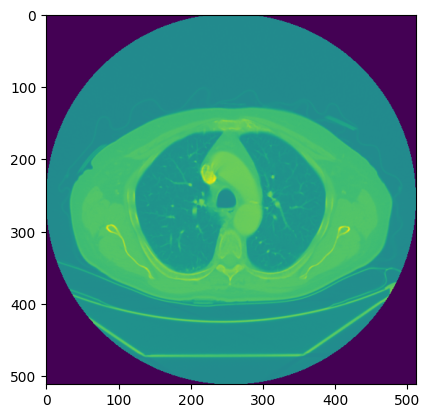

In [252]:
plt.imshow(image[:,:,20])

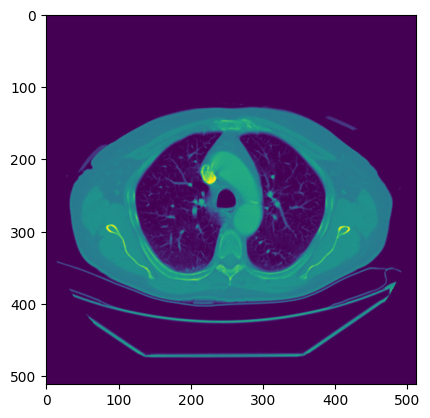

In [253]:
plt.imshow(image_apply[:,:,20])

0.0 1.0
-1024.0 3068.0


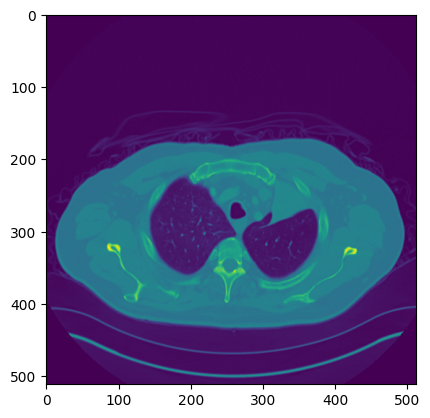

In [226]:
import matplotlib.pyplot as plt
plt.imshow(image[:,:,20])
print(np.min(image_apply),np.max(image_apply))
print(np.min(image),np.max(image))

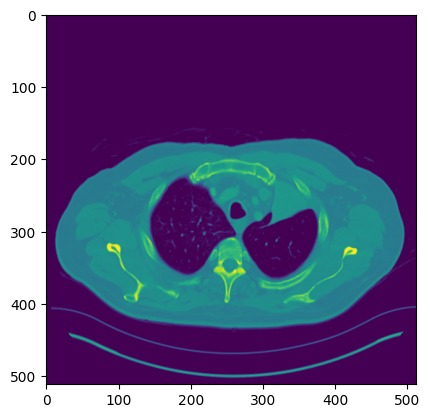

In [228]:
plt.imshow(image_apply[:,:,20])

In [48]:
pat_files=os.listdir(img_path)
pat_files.sort()
test=dicom.dcmread(os.path.join(img_path,pat_files[12])).pixel_array

0 4095


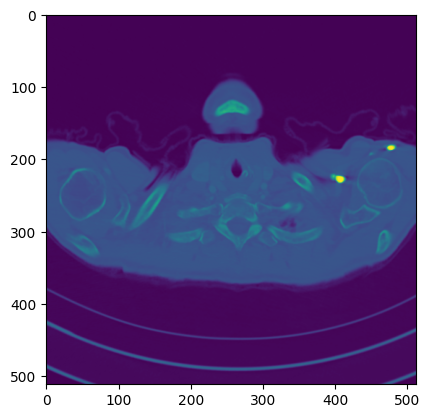

In [55]:
import matplotlib.pyplot as plt
plt.imshow(test)
print(np.min(test),np.max(test))

In [38]:
img_path

'../../../data/Mediastinal-Lymph-Node-SEG/Mediastinal-Lymph-Node-SEG-DA-RAD/Mediastinal-Lymph-Node-SEG/case_0478/06-22-2014-12845/3.000000-35071'

In [ ]:
pat_files=os.listdir(path)
    pat_files.sort()
    img_3d=[]
    for i in pat_files:
        img_3d.append(dicom.dcmread(os.path.join(path,i)).pixel_array)
    array_3d = np.array(img_3d)
    D, H, W = np.shape(array_3d)
    return array_3d.reshape(H,W,D)

In [ ]:
file_data=self.dataframe_mode.iloc[idx]
img_path = os.path.join(self.image_folder,file_data["patient_id"],file_data["path"])
image = get_dcm(img_path)
image = utils.apply_window_ct(image, width=1800, level=40)


In [143]:
import nrrd
path_ct="../../../shared_data/NSCLC_Radiogenomics/images/R01-057/ct/R01-057_ct_image.nrrd"
img, _ = nrrd.read(path_ct)
print(np.min(img),np.max(img))

-2047 3071


In [142]:
ls ../../../shared_data/NSCLC_Radiogenomics/images/R01-057/ct/

R01-057_ct_image.nrrd  R01-057_ct_segmentation.nrrd


In [146]:
image

array([[[-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        ...,
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048]],

       [[-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        ...,
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048]],

       [[-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        ...,
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -20

In [163]:
file_data=dataframe_mode.iloc[12]
img_path = os.path.join(img_folder,file_data["patient_id"],file_data["path"])
path=img_path
pat_files=os.listdir(path)
pat_files.sort()
dicom_img=dicom.dcmread(os.path.join(img_path,pat_files[1]))


In [182]:
dicom_img[(0x0028, 0x1052)].value

'-1024'

In [179]:
dicom_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.324663576664607094283802632719166005540
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.3246635766646

In [53]:
def nrrd2voxels(data_info, dataset_path, modality):
    """ Get and stack patient slices into volumetrics arrays

    Args:
        data_info (pd.DataFrame): Info of patient.
        dataset_path (str): path to images.
        pet (bool, optional): pet images are divided by the mean of the liver pet. Defaults to False.

    Returns:
        img (np.array): CT or PET 3D data with shape (H, W, slices).
        mask (np.array): 3D nodule mask with shape (H, W, slices).
        label (np.array): nodule EGFR class 0: wildtype, 1: mutant, 2: unknown 3: not collected.

    """
    patient_id=data_info["patient_id"]
    path_img = os.path.join(dataset_path,patient_id,modality,data_info[f"{modality}_img_name"])
    path_mask = os.path.join(dataset_path,patient_id,modality,data_info[f"{modality}_seg_name"])
    img, other = nrrd.read(path_img)
    msk, _ = nrrd.read(path_mask)
    pet_liver_mean = 1
   
    if modality=="pet":
        pet_liver_mean = data_info["pet_mean"] + 1e-10
        img = img / pet_liver_mean
    else:
        img = apply_window_ct(img, width=1800, level=40)
    
    return img, msk, other

In [ ]:
from torch.utils.data import Dataset
import os
import torch
import pandas as pd
import nrrd
from tqdm import tqdm
import numpy as np
class MyDataset_MLNS(Dataset):
    def __init__(self):
        dataframe = pd.read_csv("../../CT-Encoders/MLNS.csv")
        self.dataframe_1 = dataframe[dataframe["in_range"]==1]
        self.img_folder="../../../data/Mediastinal-Lymph-Node-SEG/Mediastinal-Lymph-Node-SEG-DA-RAD/Mediastinal-Lymph-Node-SEG"
        
        
    def __getitem__(self, index):
        file_data=self.dataframe_1.iloc[index]
        img_path = os.path.join(self.img_folder,file_data["patient_id"],file_data["path"])
        image = get_dcm(img_path)
        image_apply = apply_window_ct(image, width=1800, level=40)
        return image_apply

    def __len__(self):
        return len(self.dataframe_1)
    
class MyDataset_NSCLC(Dataset):
    def __init__(self,modality):
        self.modality=modality
        dataframe = pd.read_csv("../../../data/NSCLC_Radiogenomics/info_dataset.csv")
        self.dataframe_1 = dataframe[dataframe["pet_segmentation"]==True]
        self.img_folder="../../../data/NSCLC_Radiogenomics/images"
        
        
    def __getitem__(self, index):
        file_data=self.dataframe_1.iloc[index]
        img, _, _=nrrd2voxels(file_data, self.img_folder, self.modality)
        return img

    def __len__(self):
        return len(self.dataframe_1)

dataset = MyDataset_NSCLC("pet")
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    num_workers=1,
    shuffle=False
)


nb_samples = 0.
channel_mean = 0
channel_std = 0
for images in tqdm(loader):
    # scale image to be between 0 and 1 
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1)*images.size(2)*images.size(3))
    channel_mean+=images.mean(1).sum(0)
    channel_std+=images.std(1).sum(0)
    #print(channel_mean,channel_std,np.shape(channel_mean),np.shape(channel_std))
    nb_samples += batch_samples

channel_mean /= nb_samples
channel_std /= nb_samples


  0%|                                                                                                                                            | 0/173 [00:00<?, ?it/s]

(128, 128, 257)
(128, 128, 205)


  1%|▊                                                                                                                                   | 1/173 [00:00<00:18,  9.44it/s]

(128, 128, 247)
(168, 168, 325)
(128, 128, 247)


  2%|███                                                                                                                                 | 4/173 [00:00<00:09, 18.49it/s]

(192, 192, 227)


  3%|████▌                                                                                                                               | 6/173 [00:00<00:09, 17.71it/s]

(192, 192, 263)
(192, 192, 263)


  5%|██████                                                                                                                              | 8/173 [00:00<00:11, 13.84it/s]

(192, 192, 515)
(192, 192, 299)
(192, 192, 227)


  6%|███████▌                                                                                                                           | 10/173 [00:00<00:18,  9.00it/s]

(128, 128, 299)
(128, 128, 247)


  7%|█████████                                                                                                                          | 12/173 [00:01<00:14, 10.84it/s]

(128, 128, 171)
(192, 192, 263)


  9%|███████████▎                                                                                                                       | 15/173 [00:01<00:11, 13.38it/s]

(144, 144, 234)
(128, 128, 257)
(128, 128, 247)


 10%|████████████▊                                                                                                                      | 17/173 [00:01<00:10, 14.57it/s]

(128, 128, 257)
(128, 128, 267)


 12%|███████████████▏                                                                                                                   | 20/173 [00:01<00:09, 16.98it/s]

(192, 192, 299)
(144, 144, 255)
(128, 128, 257)


 13%|████████████████▋                                                                                                                  | 22/173 [00:01<00:10, 15.06it/s]

(192, 192, 551)


 14%|██████████████████▏                                                                                                                | 24/173 [00:01<00:13, 11.05it/s]

(192, 192, 263)
(192, 192, 263)
(128, 128, 239)


 15%|███████████████████▋                                                                                                               | 26/173 [00:02<00:13, 10.95it/s]

(128, 128, 257)
(128, 128, 257)
(128, 128, 257)


 17%|█████████████████████▉                                                                                                             | 29/173 [00:02<00:10, 13.91it/s]

(128, 128, 257)
(128, 128, 287)
(128, 128, 257)


 18%|████████████████████████▏                                                                                                          | 32/173 [00:02<00:08, 15.83it/s]

(192, 192, 263)
(128, 128, 267)


 20%|█████████████████████████▋                                                                                                         | 34/173 [00:02<00:08, 15.74it/s]

(192, 192, 551)
(128, 128, 257)


 21%|███████████████████████████▎                                                                                                       | 36/173 [00:02<00:12, 11.38it/s]

(192, 192, 551)


 22%|████████████████████████████▊                                                                                                      | 38/173 [00:03<00:14,  9.43it/s]

(192, 192, 551)
(128, 128, 205)
(128, 128, 257)


 23%|██████████████████████████████▎                                                                                                    | 40/173 [00:03<00:16,  8.29it/s]

(192, 192, 542)


 24%|███████████████████████████████▊                                                                                                   | 42/173 [00:03<00:16,  7.95it/s]

(192, 192, 263)
(192, 192, 263)


 25%|████████████████████████████████▌                                                                                                  | 43/173 [00:03<00:16,  8.02it/s]

(192, 192, 262)


 26%|██████████████████████████████████                                                                                                 | 45/173 [00:04<00:15,  8.03it/s]

(168, 168, 290)


 27%|██████████████████████████████████▊                                                                                                | 46/173 [00:04<00:16,  7.77it/s]

(128, 128, 257)


 27%|███████████████████████████████████▌                                                                                               | 47/173 [00:04<00:16,  7.68it/s]

(144, 213, 144)


 28%|████████████████████████████████████▎                                                                                              | 48/173 [00:04<00:16,  7.76it/s]

(128, 128, 299)
(192, 192, 551)


 28%|█████████████████████████████████████                                                                                              | 49/173 [00:04<00:20,  6.05it/s]

(144, 144, 213)


 29%|█████████████████████████████████████▊                                                                                             | 50/173 [00:05<00:24,  4.93it/s]

(192, 192, 515)


 29%|██████████████████████████████████████▌                                                                                            | 51/173 [00:05<00:23,  5.24it/s]

(128, 128, 257)


 30%|███████████████████████████████████████▍                                                                                           | 52/173 [00:05<00:25,  4.70it/s]

(128, 128, 287)


 31%|████████████████████████████████████████▏                                                                                          | 53/173 [00:05<00:23,  5.00it/s]

(192, 192, 263)


 31%|████████████████████████████████████████▉                                                                                          | 54/173 [00:05<00:20,  5.80it/s]

(192, 192, 263)

 32%|█████████████████████████████████████████▋                                                                                         | 55/173 [00:05<00:20,  5.68it/s]


(144, 144, 192)

 32%|██████████████████████████████████████████▍                                                                                        | 56/173 [00:06<00:21,  5.46it/s]


(168, 168, 329)

 33%|███████████████████████████████████████████▏                                                                                       | 57/173 [00:06<00:20,  5.60it/s]


(128, 128, 257)


 34%|███████████████████████████████████████████▉                                                                                       | 58/173 [00:06<00:19,  5.76it/s]

(128, 128, 257)


 34%|████████████████████████████████████████████▋                                                                                      | 59/173 [00:06<00:18,  6.25it/s]

(168, 168, 206)


 35%|█████████████████████████████████████████████▍                                                                                     | 60/173 [00:06<00:16,  6.76it/s]

(192, 192, 263)

 35%|██████████████████████████████████████████████▏                                                                                    | 61/173 [00:06<00:15,  7.42it/s]


(192, 192, 299)

 36%|██████████████████████████████████████████████▉                                                                                    | 62/173 [00:06<00:17,  6.43it/s]


(192, 192, 263)


 36%|███████████████████████████████████████████████▋                                                                                   | 63/173 [00:07<00:19,  5.60it/s]

(128, 128, 257)
(128, 128, 205)


 37%|████████████████████████████████████████████████▍                                                                                  | 64/173 [00:07<00:19,  5.48it/s]

(192, 192, 263)

 38%|█████████████████████████████████████████████████▏                                                                                 | 65/173 [00:07<00:17,  6.28it/s]

 38%|█████████████████████████████████████████████████▉                                                                                 | 66/173 [00:07<00:15,  7.06it/s]

(128, 128, 205)


 39%|██████████████████████████████████████████████████▋                                                                                | 67/173 [00:07<00:13,  7.63it/s]

(128, 128, 257)


 39%|███████████████████████████████████████████████████▍                                                                               | 68/173 [00:07<00:12,  8.18it/s]

(128, 128, 257)


 40%|████████████████████████████████████████████████████▏                                                                              | 69/173 [00:07<00:12,  8.10it/s]

(192, 192, 263)


 40%|█████████████████████████████████████████████████████                                                                              | 70/173 [00:08<00:12,  7.93it/s]

(128, 128, 247)


 41%|█████████████████████████████████████████████████████▊                                                                             | 71/173 [00:08<00:13,  7.41it/s]

(128, 128, 247)


 42%|███████████████████████████████████████████████████████▎                                                                           | 73/173 [00:08<00:12,  8.13it/s]

In [61]:
dd=MyDataset_NSCLC("pet")

(128, 128, 257)
(128, 128, 257)
0.0 0.061062858 1.0


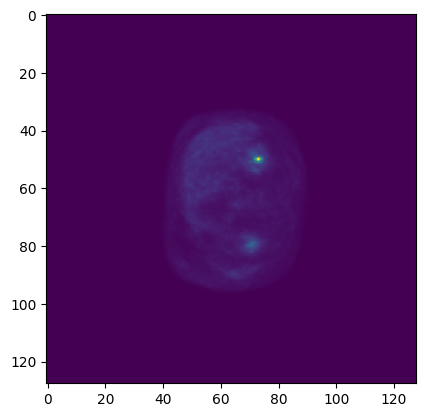

In [84]:
import matplotlib.pyplot as plt
plt.imshow(dd[0][:,:,123])
dd1=np.clip(dd[0], 0, 1)

print(np.min(dd1),np.mean(dd1),np.max(dd1))

In [88]:
import imageio
with imageio.get_writer('3d_test_clip.gif', mode='I', duration=0.1) as writer: # duration in seconds
    for image in dd1*255:
        writer.append_data(image)

In [65]:
347.265625+819.09997559

1166.36560059

In [74]:
print(channel_mean,channel_std)

tensor(0.0660) tensor(0.2874)


In [46]:
pd.read_csv("../../../data/NSCLC_Radiogenomics/info_dataset.csv")

,patient_id,ct_segmentation,ct_seg_name,ct_image,ct_img_name,chest_ct_segmentation,chest_ct_seg_name,chest_ct_image,chest_ct_img_name,pet_segmentation,pet_seg_name,pet_image,pet_img_name,pet_mean,egfr,egfr_exist
0,R01-069,True,R01-069_ct_segmentation.nrrd,True,R01-069_ct_image.nrrd,True,R01-069_chest_ct_segmentation.dcm,True,R01-069_chest_ct_image.nrrd,True,R01-069_pet_segmentation.nrrd,True,R01-069_pet_image.nrrd,6207.614599,Wildtype,1
1,R01-012,True,R01-012_ct_segmentation.nrrd,True,R01-012_ct_image.nrrd,True,R01-012_chest_ct_segmentation.dcm,True,R01-012_chest_ct_image.nrrd,True,R01-012_pet_segmentation.nrrd,True,R01-012_pet_image.nrrd,10518.674753,Wildtype,1
2,R01-117,True,R01-117_ct_segmentation.nrrd,True,R01-117_ct_image.nrrd,True,R01-117_chest_ct_segmentation.dcm,True,R01-117_chest_ct_image.nrrd,True,R01-117_pet_segmentation.nrrd,True,R01-117_pet_image.nrrd,4695.834781,Wildtype,1
3,R01-161,True,R01-161_ct_segmentation.nrrd,True,R01-161_ct_image.nrrd,False,NaN,False,NaN,True,R01-161_pet_segmentation.nrrd,True,R01-161_pet_image.nrrd,10686.898557,Wildtype,1
4,R01-118,True,R01-118_ct_segmentation.nrrd,True,R01-118_ct_image.nrrd,True,R01-118_chest_ct_segmentation.dcm,True,R01-118_chest_ct_image.nrrd,True,R01-118_pet_segmentation.nrrd,True,R01-118_pet_image.nrrd,6746.900748,Wildtype,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,R01-071,True,R01-071_ct_segmentation.nrrd,True,R01-071_ct_image.nrrd,True,R01-071_chest_ct_segmentation.dcm,True,R01-071_chest_ct_image.nrrd,True,R01-071_pet_segmentation.nrrd,True,R01-071_pet_image.nrrd,9545.088503,Wildtype,1
203,R01-102,True,R01-102_ct_segmentation.nrrd,True,R01-102_ct_image.nrrd,True,R01-102_chest_ct_segmentation.nrrd,True,R01-102_chest_ct_image.nrrd,True,R01-102_pet_segmentation.nrrd,True,R01-102_pet_image.nrrd,6686.952455,Unknown,0
204,R01-100,True,R01-100_ct_segmentation.nrrd,True,R01-100_ct_image.nrrd,True,R01-100_chest_ct_segmentation.nrrd,True,R01-100_chest_ct_image.nrrd,True,R01-100_pet_segmentation.nrrd,True,R01-100_pet_image.nrrd,8497.948144,Wildtype,1
205,R01-146,True,R01-146_ct_segmentation.nrrd,True,R01-146_ct_image.nrrd,True,R01-146_chest_ct_segmentation.dcm,True,R01-146_chest_ct_image.nrrd,True,R01-146_pet_segmentation.nrrd,True,R01-146_pet_image.nrrd,17140.362664,Mutant,1
